# Strategic Location for Establishing an Asian Restaurant 

## Introduction :

The success of establishing a new restaurant depends on several factors: demand, brand loyalty, quality of food, competition, and so on. In most cases, a restaurant's location plays an essential determinant for its success. Hence, it is advantageous and of utmost importance to determine the most strategic location for establishment in order to maximize business profits.

## Business Problem :


Client seeks to establish a franchised Asian restaurant in a Toronto neighborhood. Which neighborhood would appear to be the optimal and most strategic location for the business
A client seeks to establish a franchised Asian restaurant in a Toronto neighborhood. Which neighbourhood would appear to be the optimal and most strategic location for the business operations? The objective of this capstone project is to locate the optimal neighborhood for operation. Our foundation of reasoning would be based off of spending power, distribution of ethnic group, and competition, across each neighbourhood. We will mainly be utilizing the Foursquare API and the extensive geographical and census data from Toronto's Open Data Portal

## Data 

The Foursquare API will be used to explore neighborhoods in Toronto, more specifically, we will be using the explore function to get the most common venue categories in each neighborhood.

Neighbourhood names, alongside their corresponding boroughs and postal codes, scraped from Wikipedia: (https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050)

The Toronto's census data for its social demographic characteristics will be distilled from Toronto's Neighborhood Profile (https://bit.ly/3airrOJ).

Geographical coordinates of each neighbourhood: (https://cocl.us/Geospatial_data)

For returning the number of Asian restaurants in the vicinity of each neighbourhood, we will be utilizing Foursquare API, more specifically, its explore function. One has to register for a Foursquare developer account https://foursquare.com/developers/apps to access their API credentials.


### Data Sourcing 


### Import Data from census CSV files

In [2]:
#Importing Necessary Packages to Work with Data 

import pandas as pd
import numpy as np

### Load data and store in respective dataframes

In [3]:
# load total population of each Toronto neighbourhood
pop_path = pd.read_csv('population.txt')
df_pop = pd.DataFrame(pop_path)
df_pop.drop(['Neighbourhood Id'], axis=1, inplace=True)

# load population of Southeast Asians in Toronto neighbourhoods
ethnic_path = pd.read_csv('ethnic.txt')
df_ethnic = pd.DataFrame(ethnic_path)
df_ethnic.drop(['Neighbourhood Id'], axis=1, inplace=True)
df_ethnic.rename(columns={'   Southeast Asian': 'Southeast Asian'}, inplace=True)

# load household income of each Toronto neighbourhood
income_path = pd.read_csv('income.txt')
df_income = pd.DataFrame(income_path)
df_income.drop(['Neighbourhood Id'], axis=1, inplace=True)

print("{}, {}, {}".format(df_ethnic.shape[1], df_pop.shape[1], df_income.shape[1]))

2, 2, 2


### Merge the three dataframes

In [4]:
from functools import reduce
dfs = [df_pop, df_ethnic, df_income]
df_census = reduce(lambda left,right: pd.merge(left,right,on='Neighbourhood'), dfs)
df_census.rename(columns={'After-Tax Household Income': 'Household Income'}, inplace=True)
df_census.head()

,Neighbourhood,Total Population,Southeast Asian,Household Income
0,West Humber-Clairville,33312.0,490.0,59703.0
1,Mount Olive-Silverstone-Jamestown,32954.0,590.0,46986.0
2,Thistletown-Beaumond Heights,10360.0,120.0,57522.0
3,Rexdale-Kipling,10529.0,170.0,51194.0
4,Elms-Old Rexdale,9456.0,370.0,49425.0


 ### Merging geographical data

In [5]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]

df = df[df.Borough!='Not assigned']
df = pd.merge(df, df_geo, left_on='Postcode', right_on='Postal Code').drop(['Postal Code', 'Postcode', 'Borough'], axis=1)
df = pd.merge(df, df_census, on='Neighbourhood', how='left').dropna(how='any', axis=0).reset_index(drop=True)
df.head()

,Neighbourhood,Latitude,Longitude,Total Population,Southeast Asian,Household Income
0,Victoria Village,43.725882,-79.315572,17510.0,95.0,43743.0
1,Rouge,43.806686,-79.194353,46496.0,295.0,72784.0
2,Malvern,43.806686,-79.194353,43794.0,200.0,53425.0
3,Highland Creek,43.784535,-79.160497,12494.0,85.0,87321.0
4,Flemingdon Park,43.725900,-79.340923,21933.0,230.0,43511.0


### Get the percentage of Southeast Asian in the total population

In [7]:
df['Percentage of Southeast Asian'] = df['Southeast Asian'] / df['Total Population'] * 100
df.drop(['Total Population', 'Southeast Asian'], axis=1, inplace=True)
df.head()

,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian
0,Victoria Village,43.725882,-79.315572,43743.0,0.542547
1,Rouge,43.806686,-79.194353,72784.0,0.634463
2,Malvern,43.806686,-79.194353,53425.0,0.456684
3,Highland Creek,43.784535,-79.160497,87321.0,0.680327
4,Flemingdon Park,43.725900,-79.340923,43511.0,1.048648


### Create a Folium map

In [8]:
# get location of Toronto using geopy
from geopy.geocoders import Nominatim
address = 'Toronto'
geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Toronto are {}, {}".format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347


In [9]:
# Folium mapping
import folium
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Toronto)

map_Toronto

### Explore the neighbourhood using the Foursquare API

In [10]:
# define Foursquare API credentials and version
CLIENT_ID = '4UQVVHBJCDCVOZREL1NSC23LD2RQGL1K2LESUQZUYCJR4BNH' # your Foursquare ID
CLIENT_SECRET = '42IS4TEO13A0IHKALY2BPJFTKPVGTOC0AJ4YOOYZZGRFQ2JI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


### Get the top 100 venues that are in Toronto within a radius of 1500 meters

In [13]:
import requests
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
  venues_list = []
  for name, lat, lng in zip(names, latitudes, longitudes):
    print(name)

    #create the API request url
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )



    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results
        ])
  
  nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
  nearby_venues.columns = ['Neighbourhood',
                           'Neighbourhood Latitude',
                           'Neighbourhood Longitude',
                           'Venue',
                           'Venue Latitude',
                           'Venue Longitude',
                           'Venue Category']

  return(nearby_venues)

In [14]:
# run the function above to each neighborhood and create a new dataframe called manhattan_venues
toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude'])

toronto_venues

Victoria Village
Rouge
Malvern
Highland Creek
Flemingdon Park
Humewood-Cedarvale
Markland Wood
Guildwood
Morningside
West Hill
The Beaches
Woburn
Hillcrest Village
Bathurst Manor
Thorncliffe Park
Scarborough Village
Henry Farm
Little Portugal
Ionview
Kennedy Park
Bayview Village
Oakridge
Humber Summit
Cliffcrest
Mount Dennis
Weston
Dorset Park
Forest Hill North
Willowdale West
Roncesvalles
Agincourt North
Milliken
New Toronto
Alderwood
Long Branch


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
1,Victoria Village,43.725882,-79.315572,Armenian Kitchen,43.731071,-79.305390,Middle Eastern Restaurant
2,Victoria Village,43.725882,-79.315572,Sultan Of Samosas,43.718823,-79.304350,Indian Restaurant
3,Victoria Village,43.725882,-79.315572,Aga Khan Museum,43.725105,-79.332076,History Museum
4,Victoria Village,43.725882,-79.315572,Jatujak,43.736208,-79.307668,Thai Restaurant
5,Victoria Village,43.725882,-79.315572,North Beach Indoor Volleyball Academy,43.737191,-79.323714,Gym / Fitness Center
6,Victoria Village,43.725882,-79.315572,Diwan,43.725002,-79.332019,Middle Eastern Restaurant
7,Victoria Village,43.725882,-79.315572,Shirin Kebab House,43.725503,-79.298132,Middle Eastern Restaurant
8,Victoria Village,43.725882,-79.315572,Tim Hortons,43.723399,-79.302647,Coffee Shop
9,Victoria Village,43.725882,-79.315572,Bulk Barn,43.726399,-79.299964,Grocery Store


#### Check how many venues were returned for each neighbourhood

In [15]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt North,73,73,73,73,73,73
Alderwood,50,50,50,50,50,50
Bathurst Manor,45,45,45,45,45,45
Bayview Village,15,15,15,15,15,15
Cliffcrest,45,45,45,45,45,45
Dorset Park,59,59,59,59,59,59
Flemingdon Park,86,86,86,86,86,86
Forest Hill North,98,98,98,98,98,98
Guildwood,32,32,32,32,32,32


### Analyze each neighbourhood with One Hot Encoding

In [16]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix='', prefix_sep='')

# add neighbourhood to column back to data frame
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

# move neighbourhood column to the first column
cols = list(toronto_onehot)
cols.insert(0, cols.pop(cols.index('Neighbourhood')))
toronto_onehot = toronto_onehot.ix[:,cols]
toronto_onehot

C:\Users\edilbeh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


,Neighbourhood,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by neighbourhood and by taking the mean of the frequency of occurrence of Asian restaurants

In [17]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighbourhood', 'Asian Restaurant']]
toronto_grouped.set_index('Neighbourhood', inplace=True)

### Plotting a bar graph to showcase the frequency distribution of Asian restaurants in each neighbourhood.

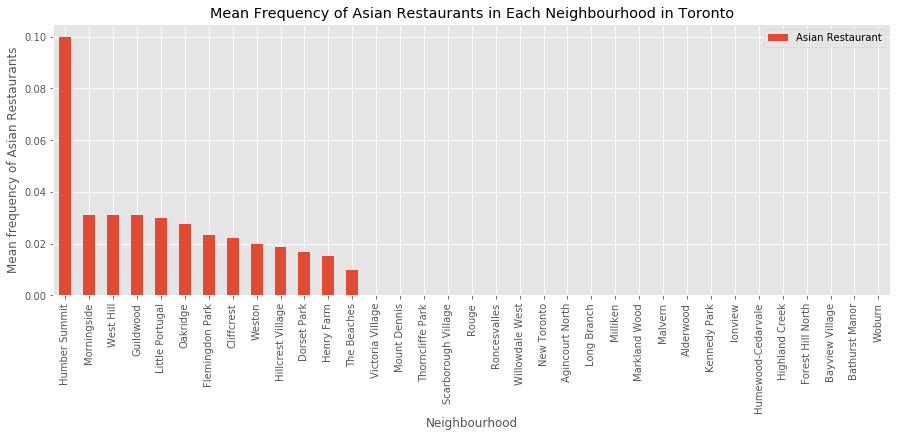

In [18]:
# sort by descending order
toronto_grouped.sort_values(by='Asian Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Asian Restaurants in Each Neighbourhood in Toronto')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean frequency of Asian Restaurants')

plt.show()

#### As inferred from the bar chart, Humber Summit is most densely populated with Asian Restaurants; hence, it is not advisable for business operations to be taken place here.

### Plotting a bar graph to illustrate the distribution of Southeast Asian population group in each neighbourhood

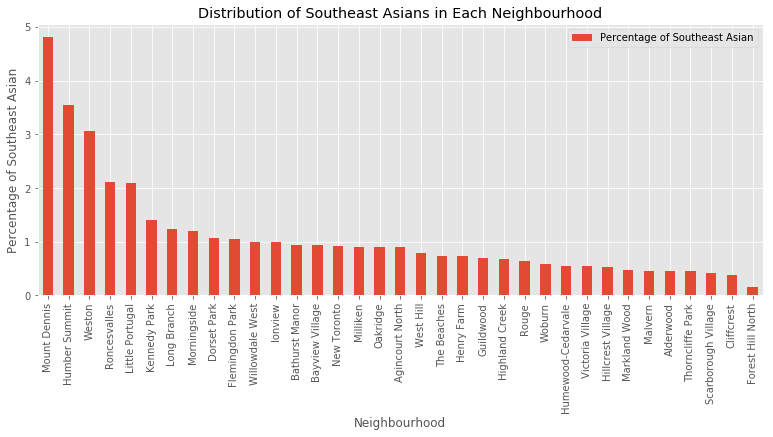

In [19]:
df_ethnic = df[['Neighbourhood', 'Percentage of Southeast Asian']].set_index('Neighbourhood')

# sort by descending order
df_ethnic.sort_values(by='Percentage of Southeast Asian', ascending=False, inplace=True)

#plot bar graph
df_ethnic.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Southeast Asians in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of Southeast Asian')

plt.show()

#### As inferred from above, Mount Dennis is the neighbourhood most densely populated with Southeast Asians.

### Plotting a bar graph to illustrate the distribution of income groups in each neighbourhood

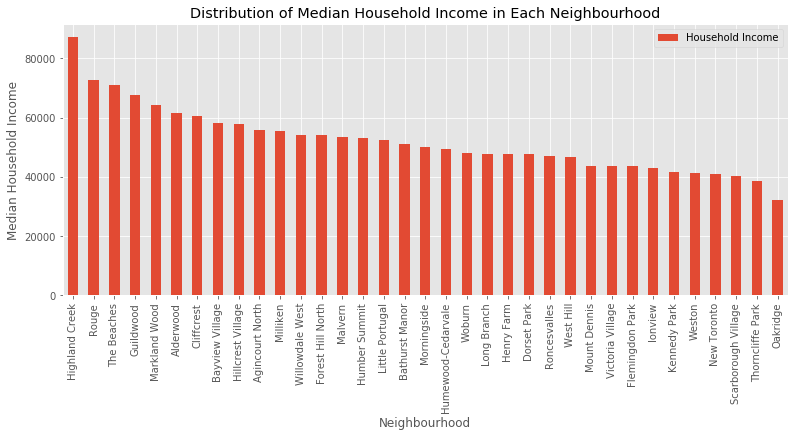

In [20]:
df_income = df[['Neighbourhood', 'Household Income']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='Household Income', ascending=False, inplace=True)

#plot bar graph
df_income.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Household Income')

plt.show()

### Finalise a dataframe for clustering

In [21]:
# merge df with toronto_grouped
df_final = pd.merge(df, toronto_grouped, on='Neighbourhood')

In [22]:
df_final.head()

,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,Asian Restaurant
0,Victoria Village,43.725882,-79.315572,43743.0,0.542547,0.000000
1,Rouge,43.806686,-79.194353,72784.0,0.634463,0.000000
2,Malvern,43.806686,-79.194353,53425.0,0.456684,0.000000
3,Highland Creek,43.784535,-79.160497,87321.0,0.680327,0.000000
4,Flemingdon Park,43.725900,-79.340923,43511.0,1.048648,0.023256


## Cluster Neighbourhoods

### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [23]:

from sklearn.preprocessing import StandardScaler
X = df_final.values[:,3:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

C:\Users\edilbeh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\edilbeh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.76318401, -0.58195085, -0.5615281 ],
       [ 1.89181483, -0.48520087, -0.5615281 ],
       [ 0.12196797, -0.67233002, -0.5615281 ],
       [ 3.22082273, -0.43692551, -0.5615281 ],
       [-0.78439402, -0.04923364,  0.64882014],
       [-0.25953784, -0.56683351, -0.5615281 ],
       [ 1.11591265, -0.65436181, -0.5615281 ],
       [ 1.4250119 , -0.41005069,  1.06487735],
       [-0.18484571,  0.11333426,  1.06487735],
       [-0.48343137, -0.32685174,  1.06487735],
       [ 1.72478605, -0.37214108, -0.04107835],
       [-0.38240958, -0.53310743, -0.5615281 ],
       [ 0.51115327, -0.59360511,  0.40226772],
       [-0.09278332, -0.15833173, -0.5615281 ],
       [-1.22925557, -0.67929527, -0.5615281 ],
       [-1.08883072, -0.71245837, -0.5615281 ],
       [-0.40517377, -0.38315284,  0.22703212],
       [ 0.03913925,  1.04564485,  0.99982113],
       [-0.83376213, -0.11132032, -0.5615281 ],
       [-0.94301194,  0.32230495, -0.5615281 ],
       [ 0.54278543, -0.1691174 , -0.561

In [24]:
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'Household Income', 1:'% Southeast Asian', 2:'No. of Asian Restaurants'}, inplace=True)
df_normalized.head()

,Household Income,% Southeast Asian,No. of Asian Restaurants
0,-0.763184,-0.581951,-0.561528
1,1.891815,-0.485201,-0.561528
2,0.121968,-0.672330,-0.561528
3,3.220823,-0.436926,-0.561528
4,-0.784394,-0.049234,0.648820


### Finding the optimal number of clusters, k

So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

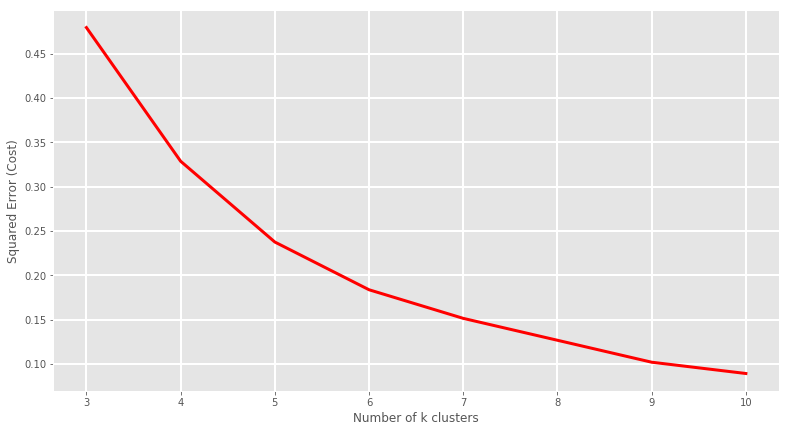

In [25]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEDE49D470>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

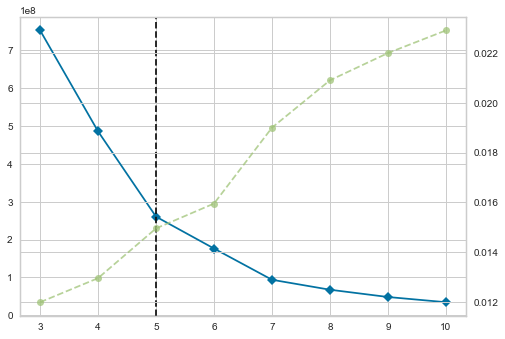

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X)
visualizer


#### After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 6 is the best value.

### Clustering the Toronto Neighborhood Using K-Means with K = 6

In [27]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 1, 4, 2, 1, 0, 0, 2, 2])

##### Create a new dataframe that includes the cluster

In [28]:
df_normalized.drop(['Household Income', '% Southeast Asian'], axis=1, inplace=True)
df_clustered = pd.merge(df, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)

#### Visulize the clusters on a map

In [29]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighbourhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

### Cluster 0

In [38]:
df_clustered.loc[df_clustered['Cluster Label'] == 0]

,Cluster Label,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
6,0,Markland Wood,43.643515,-79.577201,64297.0,0.473754,-0.561528
7,0,Guildwood,43.763573,-79.188711,67678.0,0.705859,1.064877
10,0,The Beaches,43.676357,-79.293031,70957.0,0.741874,-0.041078
12,0,Hillcrest Village,43.803762,-79.363452,57682.0,0.531475,0.402268
20,0,Bayview Village,43.786947,-79.385975,58028.0,0.934754,-0.561528
23,0,Cliffcrest,43.716316,-79.239476,60384.0,0.376530,0.595027
33,0,Alderwood,43.602414,-79.543484,61402.0,0.456280,-0.561528


### Cluster 1

In [39]:
df_clustered.loc[df_clustered['Cluster Label'] == 1]

,Cluster Label,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
0,1,Victoria Village,43.725882,-79.315572,43743.0,0.542547,-0.561528
2,1,Malvern,43.806686,-79.194353,53425.0,0.456684,-0.561528
5,1,Humewood-Cedarvale,43.693781,-79.428191,49252.0,0.556909,-0.561528
11,1,Woburn,43.770992,-79.216917,47908.0,0.588950,-0.561528
13,1,Bathurst Manor,43.754328,-79.442259,51076.0,0.945001,-0.561528
14,1,Thorncliffe Park,43.705369,-79.349372,38645.0,0.450066,-0.561528
15,1,Scarborough Village,43.744734,-79.239476,40181.0,0.418560,-0.561528
16,1,Henry Farm,43.778517,-79.346556,47659.0,0.731413,0.227032
18,1,Ionview,43.727929,-79.262029,42971.0,0.989664,-0.561528
19,1,Kennedy Park,43.727929,-79.262029,41776.0,1.401624,-0.561528


### Cluster 2

In [40]:
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
4,2,Flemingdon Park,43.725900,-79.340923,43511.0,1.048648,0.648820
8,2,Morningside,43.763573,-79.188711,50069.0,1.203094,1.064877
9,2,West Hill,43.763573,-79.188711,46803.0,0.784901,1.064877
17,2,Little Portugal,43.647927,-79.419750,52519.0,2.088823,0.999821
21,2,Oakridge,43.711112,-79.284577,32079.0,0.902853,0.884166
26,2,Dorset Park,43.757410,-79.273304,47630.0,1.059873,0.320590


### Cluster 3

In [41]:
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
22,3,Humber Summit,43.756303,-79.565963,53272.0,3.543814,4.642969


### Cluster 4 

In [42]:
df_clustered.loc[df_clustered['Cluster Label'] == 4]

,Cluster Label,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
1,4,Rouge,43.806686,-79.194353,72784.0,0.634463,-0.561528
3,4,Highland Creek,43.784535,-79.160497,87321.0,0.680327,-0.561528


### Cluster 5 

In [43]:
df_clustered.loc[df_clustered['Cluster Label'] == 5]

,Cluster Label,Neighbourhood,Latitude,Longitude,Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
24,5,Mount Dennis,43.691116,-79.476013,43790.0,4.818657,-0.561528
25,5,Weston,43.706876,-79.518188,41356.0,3.056914,0.479371
